In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import io

In [13]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [0]:
df=pd.read_csv('Churn_Modelling.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Clean the data**

In [0]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

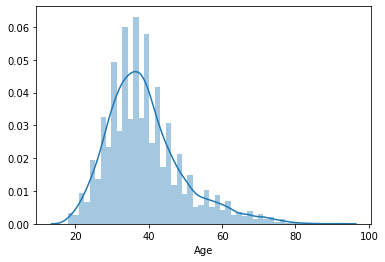

In [42]:
#Search distribution from age
ax = sns.distplot(df['Age'])

In [44]:
#Search correlation about features
df.corr( method='pearson', min_periods=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.106512
Geography_France,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.580359,0.006772


In [45]:
df.corr( method='kendall', min_periods=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Gender_Male
CreditScore,1.000000,-0.005414,0.000791,0.004034,0.010118,-0.003110,0.019844,0.000807,-0.019049,-0.005776,0.004466,-0.002463
Age,-0.005414,1.000000,-0.007424,0.023611,-0.047761,-0.012666,0.033027,-0.001571,0.268573,-0.040950,0.046619,-0.024692
Tenure,0.000791,-0.007424,1.000000,-0.007016,0.010866,0.019107,-0.024508,0.005423,-0.011947,-0.002546,-0.000522,0.012903
Balance,0.004034,0.023611,-0.007016,1.000000,-0.266748,-0.008407,-0.009828,0.008200,0.094983,-0.181908,0.317787,0.011544
NumOfProducts,0.010118,-0.047761,0.010866,-0.266748,1.000000,0.003802,0.016051,0.010130,-0.123434,0.007438,-0.023381,-0.012661
HasCrCard,-0.003110,-0.012666,0.019107,-0.008407,0.003802,1.000000,-0.011866,-0.008199,-0.007138,0.002467,0.010577,0.005766
IsActiveMember,0.019844,0.033027,-0.024508,-0.009828,0.016051,-0.011866,1.000000,-0.009365,-0.156128,0.003317,-0.020486,0.022544
EstimatedSalary,0.000807,-0.001571,0.005423,0.008200,0.010130,-0.008199,-0.009365,1.000000,0.009864,-0.002729,0.008287,-0.006752
Exited,-0.019049,0.268573,-0.011947,0.094983,-0.123434,-0.007138,-0.156128,0.009864,1.000000,-0.104955,0.173488,-0.106512
Geography_France,-0.005776,-0.040950,-0.002546,-0.181908,0.007438,0.002467,0.003317,-0.002729,-0.104955,1.000000,-0.580359,0.006772


In [46]:
df.corr( method='spearman', min_periods=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Gender_Male
CreditScore,1.000000,-0.007974,0.001133,0.005687,0.012568,-0.003802,0.024262,0.001237,-0.023289,-0.007061,0.005460,-0.003011
Age,-0.007974,1.000000,-0.010405,0.033304,-0.058566,-0.015278,0.039839,-0.002431,0.323968,-0.049396,0.056234,-0.029785
Tenure,0.001133,-0.010405,1.000000,-0.009513,0.012908,0.022354,-0.028673,0.007778,-0.013978,-0.002979,-0.000611,0.015096
Balance,0.005687,0.033304,-0.009513,1.000000,-0.316627,-0.009835,-0.011497,0.011778,0.111110,-0.212795,0.371745,0.013504
NumOfProducts,0.012568,-0.058566,0.012908,-0.316627,1.000000,0.003859,0.016292,0.012570,-0.125282,0.007550,-0.023731,-0.012851
HasCrCard,-0.003802,-0.015278,0.022354,-0.009835,0.003859,1.000000,-0.011866,-0.010041,-0.007138,0.002467,0.010577,0.005766
IsActiveMember,0.024262,0.039839,-0.028673,-0.011497,0.016292,-0.011866,1.000000,-0.011469,-0.156128,0.003317,-0.020486,0.022544
EstimatedSalary,0.001237,-0.002431,0.007778,0.011778,0.012570,-0.010041,-0.011469,1.000000,0.012081,-0.003342,0.010149,-0.008269
Exited,-0.023289,0.323968,-0.013978,0.111110,-0.125282,-0.007138,-0.156128,0.012081,1.000000,-0.104955,0.173488,-0.106512
Geography_France,-0.007061,-0.049396,-0.002979,-0.212795,0.007550,0.002467,0.003317,-0.003342,-0.104955,1.000000,-0.580359,0.006772


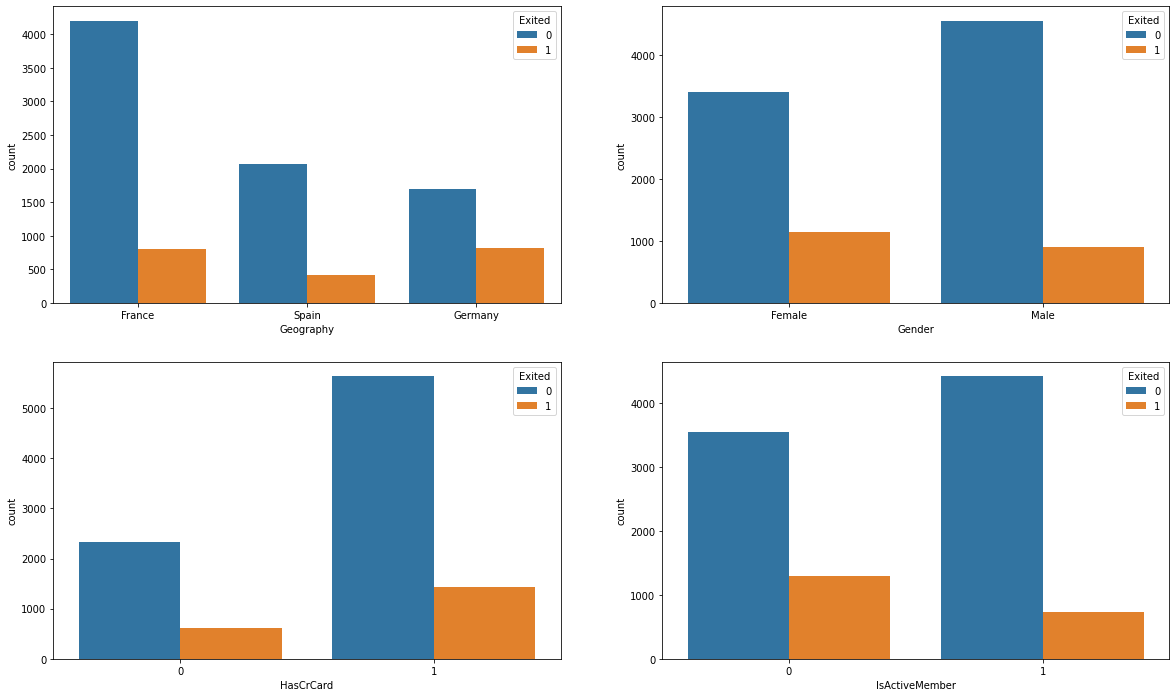

In [18]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])


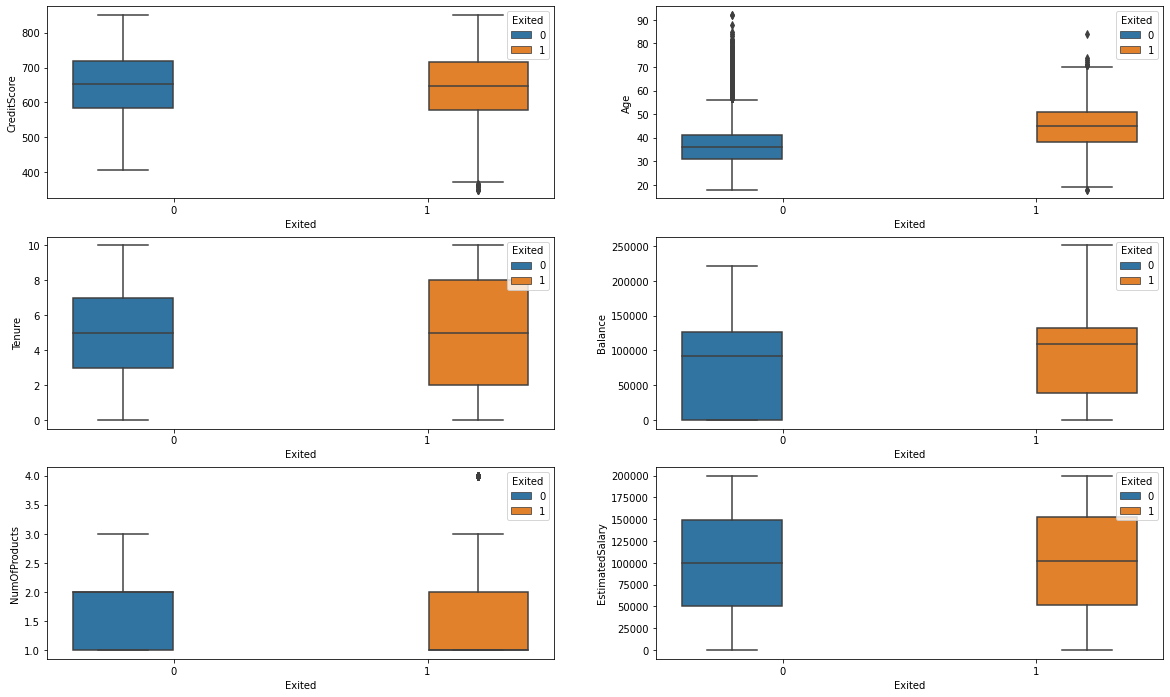

In [19]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])
plt.show()

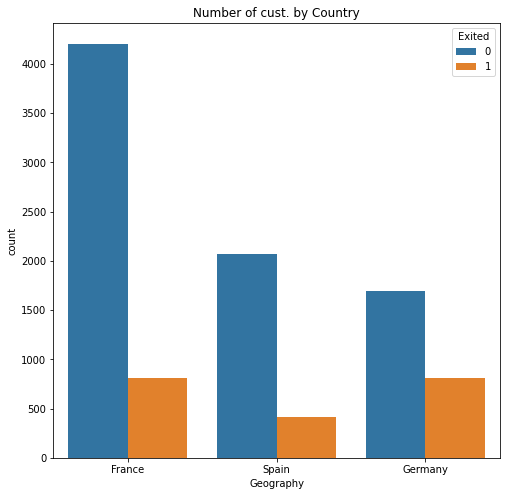

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(x='Geography',hue='Exited',data=df)
plt.title('Number of cust. by Country')
plt.show()

In [21]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

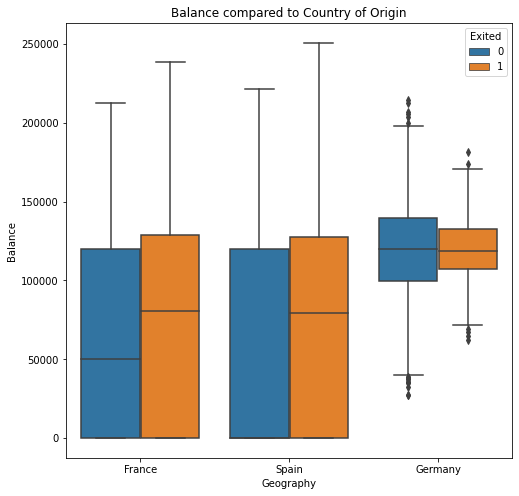

In [22]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Geography',y='Balance',hue='Exited',data=df)
plt.title('Balance compared to Country of Origin')
plt.show()

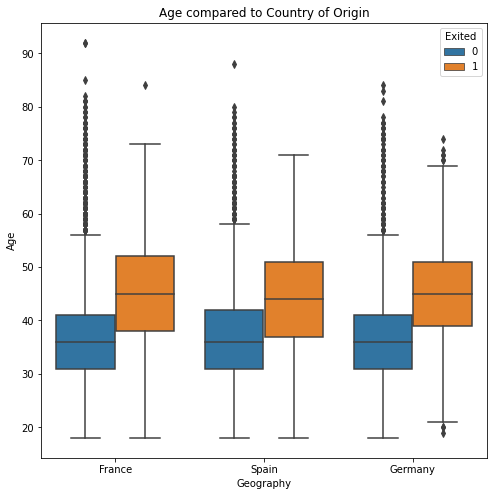

In [23]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Geography',y='Age',hue='Exited',data=df)
plt.title('Age compared to Country of Origin')
plt.show()

In [0]:
data1=df

In [0]:
df=pd.get_dummies(df)

In [0]:
df.drop(['Geography_Spain','Gender_Female'],axis=1,inplace=True)

In [27]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Gender_Male'],
      dtype='object')

In [28]:
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0
